# Projet : Étude Empirique de Données Synthétiques avec MST

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from snsynth import Synthesizer

# Configuration pour des graphiques plus lisibles
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## FONCTION DE CHARGEMENT DES DONNÉES

In [4]:
def load_adult_data():
    """Charge le jeu de données Adult depuis l'URL de l'UCI."""
    ADULT_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
    
    # Les noms des colonnes sont spécifiés dans la description du dataset
    FEATURES = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race',
        'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
        'native-country', 'income'
    ]
    
    # Charger les données avec pandas
    df = pd.read_csv(ADULT_URL, header=None, names=FEATURES, na_values=' ?', skipinitialspace=True)
    
    # On retire la colonne 'fnlwgt' qui est un poids de sondage peu utile pour notre analyse
    df = df.drop('fnlwgt', axis=1)
    
    # On supprime les lignes avec des valeurs manquantes pour simplifier
    df.dropna(inplace=True)
    
    return df

# Charger les données originales qui serviront de "vérité terrain"
df_original = load_adult_data()

print("Le jeu de données 'Adult' a été chargé avec succès.")
print(f"Nombre de lignes : {len(df_original)}")
print("Aperçu des données :")
print(df_original.head())

Le jeu de données 'Adult' a été chargé avec succès.
Nombre de lignes : 32561
Aperçu des données :
   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country i

## TÂCHE 1 : CHOIX DE L'ALGORITHME

---

**Tâche 1 : Choix de l'algorithme**

- **Algorithme choisi** : MST (Maximum Spanning Tree) Synthesizer.  
- **Raison** : C'est un algorithme robuste, état de l'art, qui se concentre sur la préservation  
  des corrélations entre les paires de variables (marginales de degré 2), ce qui en fait  
  un excellent candidat pour tester à la fois des statistiques simples et complexes.


## GÉNÉRATION DES DONNÉES SYNTHÉTIQUES

In [5]:
df_original

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
from snsynth.mst import MSTSynthesizer

print("--- Génération des données synthétiques (peut prendre quelques minutes) ---")

# Génération pour epsilon = 1 (haute confidentialité)
print("Création du synthétiseur MST pour epsilon = 1...")
synth_eps1 = MSTSynthesizer(epsilon=1.0, verbose=True) 
print("Entraînement et génération (fit_sample) pour epsilon = 1...")

# LA LIGNE CORRIGÉE : On ajoute preprocessor_eps
df_synth_eps1 = synth_eps1.fit_sample(df_original, preprocessor_eps=0.1)

print("Données synthétiques pour epsilon = 1 générées.\n")


# Génération pour epsilon = 100 (basse confidentialité)
print("Création du synthétiseur MST pour epsilon = 100...")
synth_eps100 = MSTSynthesizer(epsilon=100.0, verbose=True)
print("Entraînement et génération (fit_sample) pour epsilon = 100...")

# LA LIGNE CORRIGÉE : On ajoute preprocessor_eps
df_synth_eps100 = synth_eps100.fit_sample(df_original, preprocessor_eps=1.0)

print("Données synthétiques pour epsilon = 100 générées.\n")


--- Génération des données synthétiques (peut prendre quelques minutes) ---
Création du synthétiseur MST pour epsilon = 1...
Entraînement et génération (fit_sample) pour epsilon = 1...
Spent 0.1 epsilon on preprocessor, leaving 0.9 for training
Fitting with 836667740160000 dimensions
Getting cliques
Estimating marginals
Données synthétiques pour epsilon = 1 générées.

Création du synthétiseur MST pour epsilon = 100...
Entraînement et génération (fit_sample) pour epsilon = 100...
Spent 1.0 epsilon on preprocessor, leaving 99.0 for training
Fitting with 836667740160000 dimensions
Getting cliques
Estimating marginals
Données synthétiques pour epsilon = 100 générées.



## TÂCHE 2 : IDENTIFICATION D'UNE QUESTION STATISTIQUE SIMPLE

**Tâche 2 : Question statistique simple**

- **Question** : Quelle est la répartition de la population par niveau d'éducation ?  
- **Justification** : C'est une question simple car elle ne concerne qu'une seule variable  
  catégorielle (marginale de degré 1). On s'attend à ce que même un modèle très privé  
  capture bien cette distribution de base.


## TÂCHE 3 : ÉVALUATION DE L'UTILITÉ (QUESTION SIMPLE)

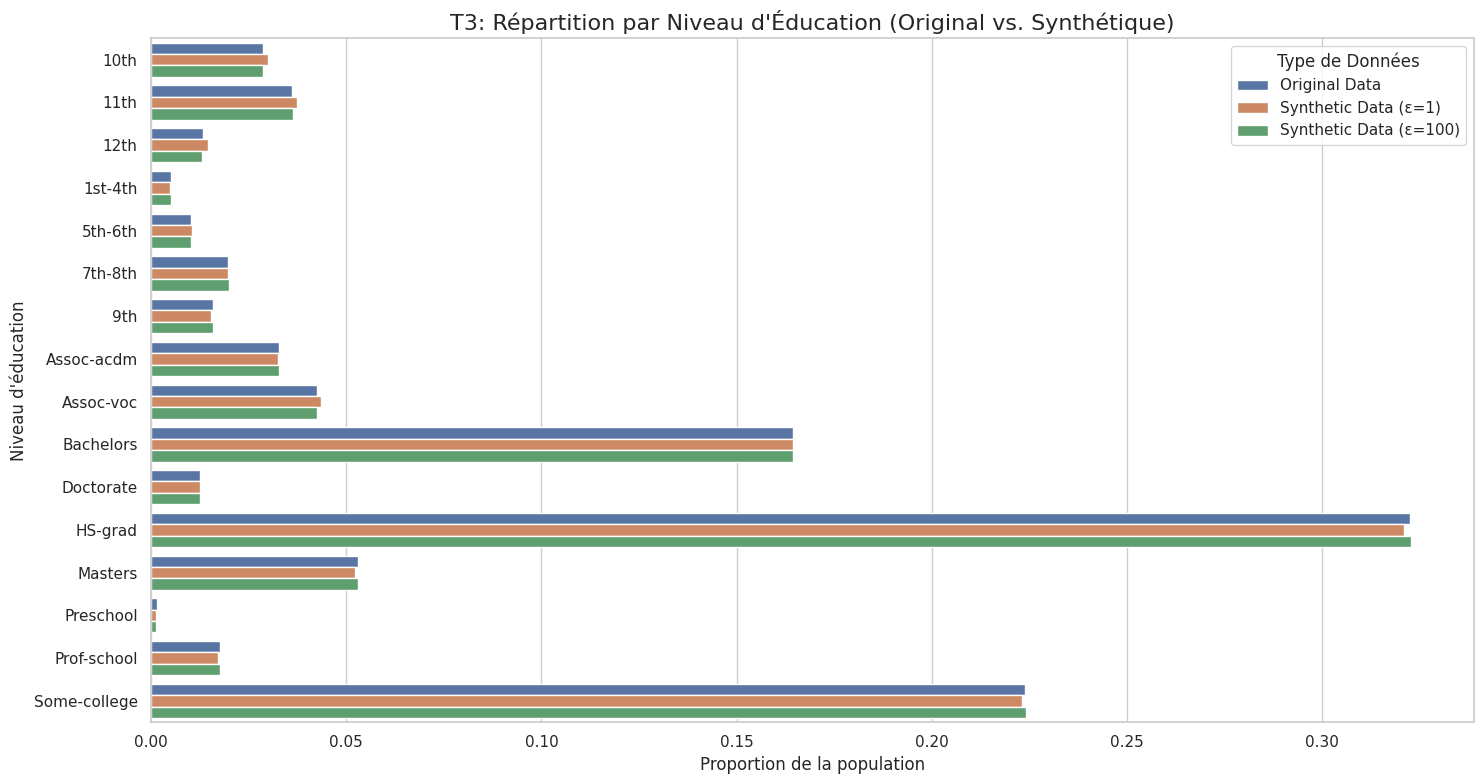

In [12]:
# 1. Calculer le résultat sur les données originales (la vérité)
truth_simple = df_original['education'].value_counts(normalize=True).sort_index()

# 2. Calculer le résultat sur les données synthétiques
result_synth_eps1_simple = df_synth_eps1['education'].value_counts(normalize=True).sort_index()
result_synth_eps100_simple = df_synth_eps100['education'].value_counts(normalize=True).sort_index()

# 3. Combiner les résultats de manière robuste pour la visualisation
comparison_df_simple = pd.concat([
    truth_simple.rename('Original Data'),
    result_synth_eps1_simple.rename('Synthetic Data (ε=1)'),
    result_synth_eps100_simple.rename('Synthetic Data (ε=100)')
], axis=1).fillna(0)

# CORRECTION: Renommer l'index avant de le transformer en colonne
comparison_df_simple.index.name = 'Education Level'
comparison_df_simple = comparison_df_simple.reset_index()

# Pivoter le tableau pour la visualisation avec seaborn
comparison_df_simple = comparison_df_simple.melt(
    id_vars='Education Level', 
    var_name='Dataset', 
    value_name='Proportion'
)

# 4. Visualiser la comparaison
plt.figure(figsize=(15, 8))
sns.barplot(data=comparison_df_simple, x='Proportion', y='Education Level', hue='Dataset', orient='h')
plt.title('T3: Répartition par Niveau d\'Éducation (Original vs. Synthétique)', fontsize=16)
plt.xlabel('Proportion de la population')
plt.ylabel('Niveau d\'éducation')
plt.legend(title='Type de Données')
plt.tight_layout()
plt.show()


**Analyse (T3)** : Le graphique ci-dessus compare les répartitions.  

- Avec **ε = 100** (basse confidentialité), les barres sont quasiment identiques à celles des données originales.  
  → L’utilité pour cette tâche simple est excellente.  

- Avec **ε = 1** (haute confidentialité), la tendance générale est préservée (ex. : *HS-grad* est le plus courant),  
  mais il y a un bruit visible. Les proportions sont légèrement différentes.  
  → L’utilité est dégradée mais reste acceptable pour une analyse générale.


##  TÂCHE 4 : IDENTIFICATION D'UNE QUESTION STATISTIQUE DIFFICILE
Question : Quelle est la relation entre le niveau d'éducation, le sexe et le revenu ?
Plus précisément : Pour chaque niveau d'éducation, quel est le pourcentage d'hommes et de femmes qui gagnent plus de 50k$ ?

## TÂCHE 5 : ÉVALUATION DE L'UTILITÉ (QUESTION DIFFICILE)

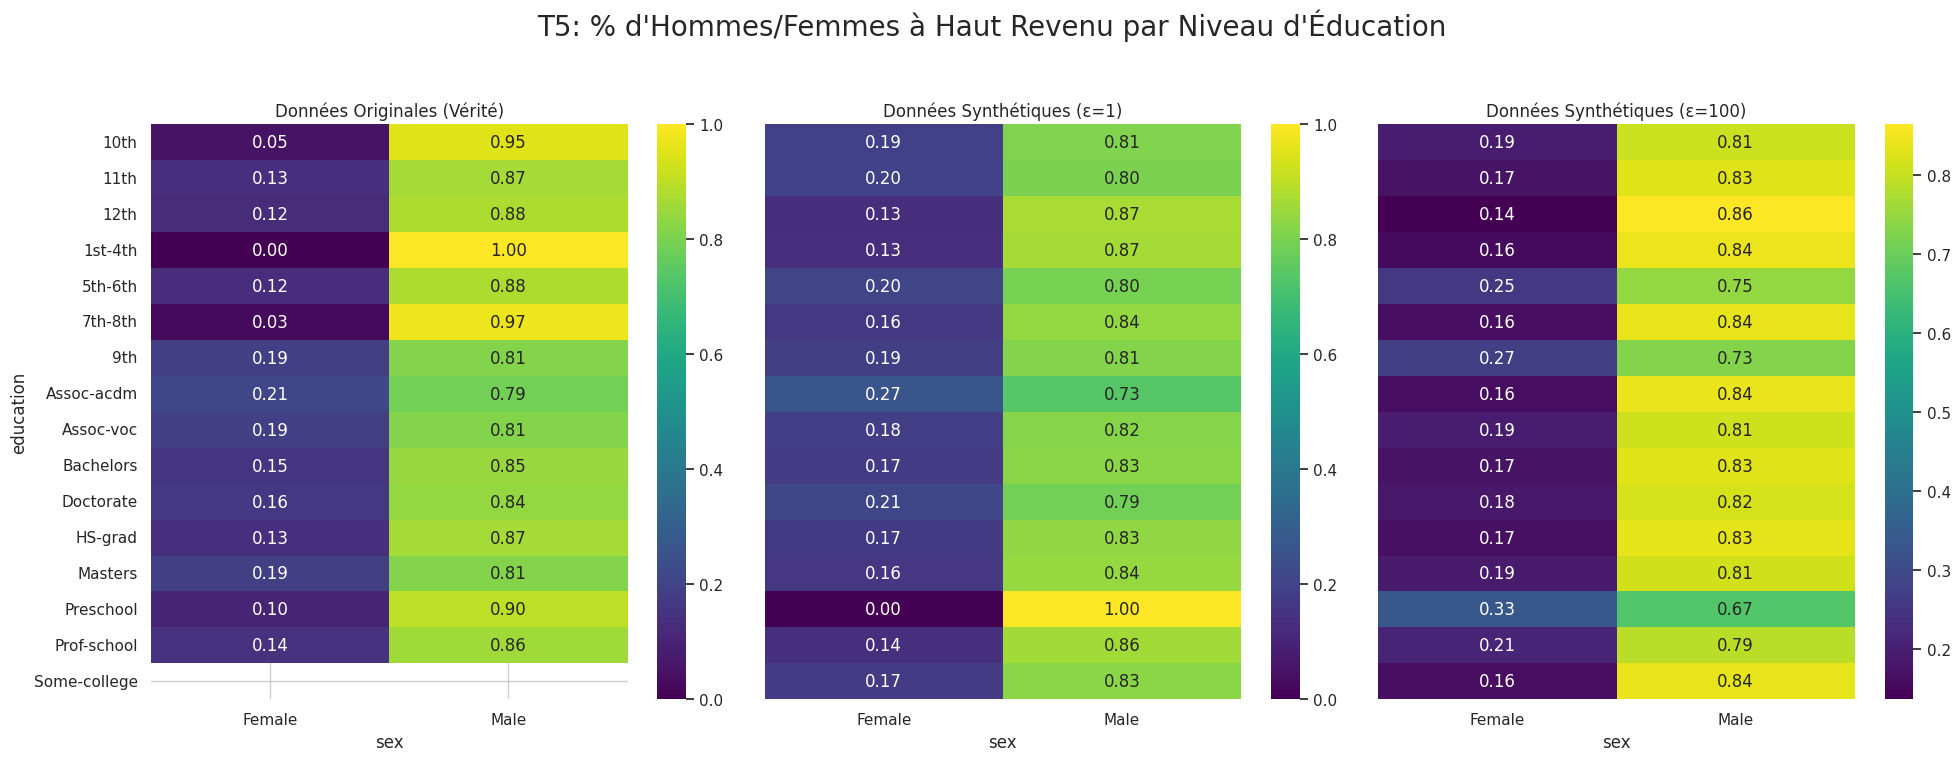

In [13]:
# Fonction pour calculer la statistique complexe
def calculate_complex_stat(df):
    # On filtre pour ne garder que les hauts revenus
    high_income_df = df[df['income'] == '>50K']
    # On calcule la répartition par sexe pour chaque niveau d'éducation
    pivot = high_income_df.pivot_table(
        index='education',
        columns='sex',
        aggfunc='size',
        fill_value=0
    )
    # On normalise pour avoir le pourcentage
    return pivot.div(pivot.sum(axis=1), axis=0)

# 1. Calculer le résultat sur les données originales (la vérité)
truth_hard = calculate_complex_stat(df_original)

# 2. Calculer le résultat sur les données synthétiques
result_synth_eps1_hard = calculate_complex_stat(df_synth_eps1)
result_synth_eps100_hard = calculate_complex_stat(df_synth_eps100)

# 3. Visualiser les comparaisons avec des heatmaps
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('T5: % d\'Hommes/Femmes à Haut Revenu par Niveau d\'Éducation', fontsize=20)

sns.heatmap(truth_hard, ax=axes[0], annot=True, cmap='viridis', fmt='.2f')
axes[0].set_title('Données Originales (Vérité)')

sns.heatmap(result_synth_eps1_hard, ax=axes[1], annot=True, cmap='viridis', fmt='.2f')
axes[1].set_title('Données Synthétiques (ε=1)')
axes[1].set_ylabel('')

sns.heatmap(result_synth_eps100_hard, ax=axes[2], annot=True, cmap='viridis', fmt='.2f')
axes[2].set_title('Données Synthétiques (ε=100)')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## TÂCHE 5 : ANALYSE DES RÉSULTATS (TÂCHE COMPLEXE)

